<a href="https://colab.research.google.com/github/edleafvirtual/Project-4-How_to_Market_New_Cards/blob/main/Part_A_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A. General Information:
- **Name:** Eduardo Galindez.
- **Date:** August 16, 2022.
- **ML Model:** Unsupervised Learning - KMeans.

# B. Code Development

## 1.- Libraries

In [1]:
# Imports.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn import set_config
set_config(display='diagram')

## 2.-  Loading Data

### 2.1.- Mount and loading

In [2]:
# Load data.
raw_df = pd.read_csv('./Data/cust_seg.csv')
raw_df.head(5)

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


### 2.2.- Data dictionary

 - We don't have data dictionary available for this [dataset](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means).

### 2.3.- Dataset preparation

In [3]:
# Let's drop unnecessary columns.
raw_df = raw_df.drop(columns=['Unnamed: 0', 'Customer Id'], axis=1)
raw_df.head(5)

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [4]:
# Rename columns.
raw_df = raw_df.rename(columns={'Edu': 'Education', 'Card Debt': 'Card', 'Other Debt':'Other'})
raw_df.head(5)

,Age,Education,Years Employed,Income,Card,Other,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
# Add new column 'Debt'.
raw_df.insert(4,'Debt',raw_df.Card + raw_df.Other) # adapted from http://pytolearn.csd.auth.gr/b4-pandas/40/moddfcols.html
raw_df.head(5)

,Age,Education,Years Employed,Income,Debt,Card,Other,Defaulted,DebtIncomeRatio
0,41,2,6,19,1.197,0.124,1.073,0.0,6.3
1,47,1,26,100,12.800,4.582,8.218,0.0,12.8
2,33,2,10,57,11.913,6.111,5.802,1.0,20.9
3,29,2,4,19,1.197,0.681,0.516,0.0,6.3
4,47,1,31,253,18.216,9.308,8.908,0.0,7.2


In [6]:
# Let's create our new dataset.
raw_df = raw_df.drop(columns=['Card', 'Other'], axis=1)
df = raw_df.copy()
df.head(5)

,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,1.197,0.0,6.3
1,47,1,26,100,12.800,0.0,12.8
2,33,2,10,57,11.913,1.0,20.9
3,29,2,4,19,1.197,0.0,6.3
4,47,1,31,253,18.216,0.0,7.2


**Observations:**
- Now our dataset is ready for the understanding process, having 7 features to work with.

## 3.- Data Understanding

In [7]:
# Let's see the general information of our dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Education        850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Debt             850 non-null    float64
 5   Defaulted        700 non-null    float64
 6   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(4)
memory usage: 46.6 KB


In [8]:
# Let's display the size of our dataframe.
print('\033[1mShape:\033[0;0m', df.shape)
print('\033[1mLength:\033[0;0m', len(df))

Shape: (850, 7)
Length: 850


In [9]:
# Looking for unique values per variable.
df.nunique()

Age                 37
Education            5
Years Employed      33
Income             129
Debt               764
Defaulted            2
DebtIncomeRatio    245
dtype: int64

In [10]:
# Let's check the statistical summary.
df.describe().round(2)

,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
count,850.00,850.00,850.00,850.00,850.00,700.00,850.00
mean,35.03,1.71,8.57,46.68,4.66,0.26,10.17
std,8.04,0.93,6.78,38.54,5.04,0.44,6.72
min,20.00,1.00,0.00,13.00,0.08,0.00,0.10
25%,29.00,1.00,3.00,24.00,1.64,0.00,5.10
50%,34.00,1.00,7.00,35.00,3.14,0.00,8.70
75%,41.00,2.00,13.00,55.75,5.73,1.00,13.80
max,56.00,5.00,33.00,446.00,48.75,1.00,41.30


In [11]:
# Looking for missing data.
print('\033[1mMissing data in total:\n\033[0;0m', df.isna().sum().sum())
print('\033[1mMissing data per column:\033[0;0m\n', df.isna().sum())

Missing data in total:
 150
Missing data per column:
 Age                  0
Education            0
Years Employed       0
Income               0
Debt                 0
Defaulted          150
DebtIncomeRatio      0
dtype: int64


In [12]:
# Calculating the impact of missing data.
miss_defaulted_data = round(df.isna().sum().sum() / len(df) * 100, 2)
print(f"The missing data from 'Defaulted' represents the", (miss_defaulted_data), '%.')

The missing data from 'Defaulted' represents the 17.65 %.


In [13]:
# Let's have a closer look of 'Defaulted' categories-values.
df['Defaulted'].value_counts()

0.0    517
1.0    183
Name: Defaulted, dtype: int64

In [14]:
# Let's identify duplicate data.
df.duplicated().sum()

0

**Observations:**
- We have ~17% of missing data. This issue will be addressed in Section 4.
- After checking the values per category inside the column with missing values (Defaulted), we might infer after the imputer the column will have a lower mean because the current mode is 0.
- There is no duplicate data to address.

## 4.- Data Cleaning

- In last section, we identified 150 rows with missing data in 'Defaulted' column. We decided to address them, replacing with the mode.
- 'Defaulted' despite being a numeric type variable, we don't want decimal values ​​in a column with 0's and 1's, for that reason mode is our best option.

In [15]:
# Replace missing values with mode.
df['Defaulted'] = df['Defaulted'].fillna(df['Defaulted'].mode()[0]) # adapted from https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

In [16]:
# Let's confirm we don't have missing data.
df.isna().sum()

Age                0
Education          0
Years Employed     0
Income             0
Debt               0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

## 5.- Exercise Solutions
- Use KMeans to create various customer segments.

In [17]:
# Instantiate Scaler.
scaler = StandardScaler()

In [18]:
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

### 5.1.- Use an Elbow Plot of Inertia

In [19]:
# Let's create an empty list of inertias.
inertias = []

In [20]:
# Loop through k values between 2 and 8 clusters.
for k in range(2,9):
    kmeans = KMeans(n_clusters=k, random_state=42)  
    kmeans.fit(scaled_df)  
    inertias.append(kmeans.inertia_)

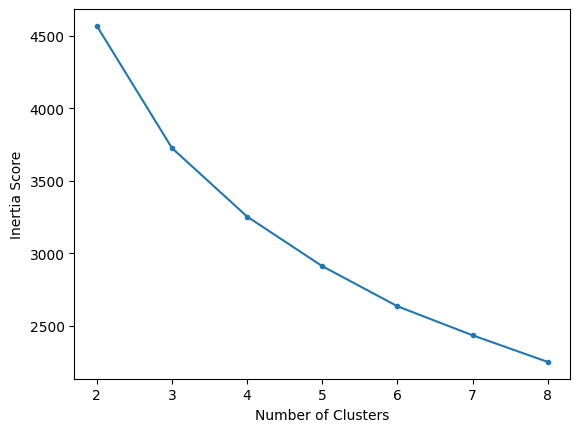

In [21]:
# Visualize scores.
plt.plot(range(2,9), inertias, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia Score');

In [22]:
# Let's get the inertia score per number of clusters.
print('Inertia per Number of Clusters are:\n', inertias)

Inertia per Number of Clusters are:
 [4569.336849212907, 3725.792492132588, 3252.5937501143076, 2910.03545348421, 2633.2308180225964, 2432.640515669358, 2248.8158917091655]


**Observations:**
- The elbow in the plot, slightly shows that with 3 clusters is where the tightness of clusters (inertia = 3,725.79) and the number of clusters are in balance.

### 5.2.- Plot of Silhouette Scores

In [23]:
# Let's create an empty list of silhouettes.
silhouette_scores = []

In [24]:
# Loop through i values between 2 and 8 clusters, and store the inertias in the list.
for i in range(2,9):
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))

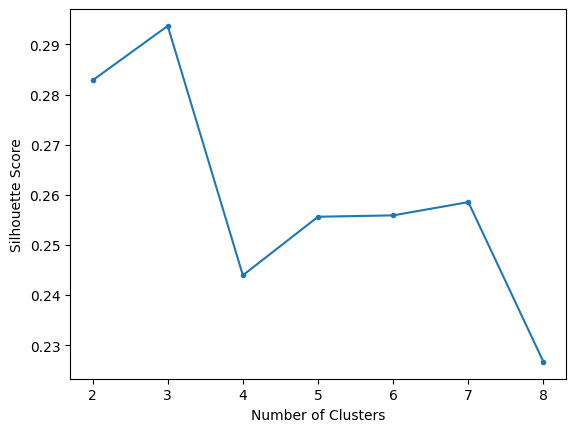

In [25]:
# Visualize scores.
plt.plot(range(2,9), silhouette_scores, marker='.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

**Observations:**
- The highest score is displayed with 3 clusters.

### 5.3.- Choose a K based on the results
- According to the results shows above, K = 3.

In [26]:
# Fit KMeans model with 3 clusters and display the silhouette score.
kmeans_with_3_clusters = KMeans(n_clusters=3, random_state=42)
kmeans_with_3_clusters.fit(scaled_df)
silhouette_score(scaled_df, kmeans_with_3_clusters.labels_).round(4)

0.2937

**Observations:**
- In the section above, we found the silhouette score (0.2937), which indicates how dense and well-separated the three clusters are.
- Having a silhouette score near 0 means that clusters are kind of [overlapping](https://dzone.com/articles/kmeans-silhouette-score-explained-with-python-exam#:~:text=The%20value%20of%20the%20Silhouette,boundary%20of%20the%20neighboring%20clusters.).


### 5.4.- Visual analysis

In [27]:
# In order to not create noise in our next plot.
modified_silhouette_scores = [i * 10000 for i in silhouette_scores] # adapted from https://stackoverflow.com/questions/35166633/how-do-i-multiply-each-element-in-a-list-by-a-number
modified_silhouette_scores

[2828.3541072452626,
 2936.9591588366916,
 2439.5225334251268,
 2556.3085508521044,
 2559.0478007616907,
 2585.500432004209,
 2266.71207463316]

In [28]:
# Let's create a DataFrame in order to summarize the results so far.
kmeans_metrics_df = pd.DataFrame()
kmeans_metrics_df['Number of Clusters'] = [2, 3, 4, 5, 6, 7, 8]
kmeans_metrics_df['Modified Silhouettes (x10K)'] = modified_silhouette_scores
kmeans_metrics_df['Inertias'] = inertias
print('\033[1mKMeans Metrics DataFrame per Number of Clusters\033[0;0m')
kmeans_metrics_df

KMeans Metrics DataFrame per Number of Clusters


,Number of Clusters,Modified Silhouettes (x10K),Inertias
0,2,2828.354107,4569.336849
1,3,2936.959159,3725.792492
2,4,2439.522533,3252.593750
3,5,2556.308551,2910.035453
4,6,2559.047801,2633.230818
5,7,2585.500432,2432.640516
6,8,2266.712075,2248.815892


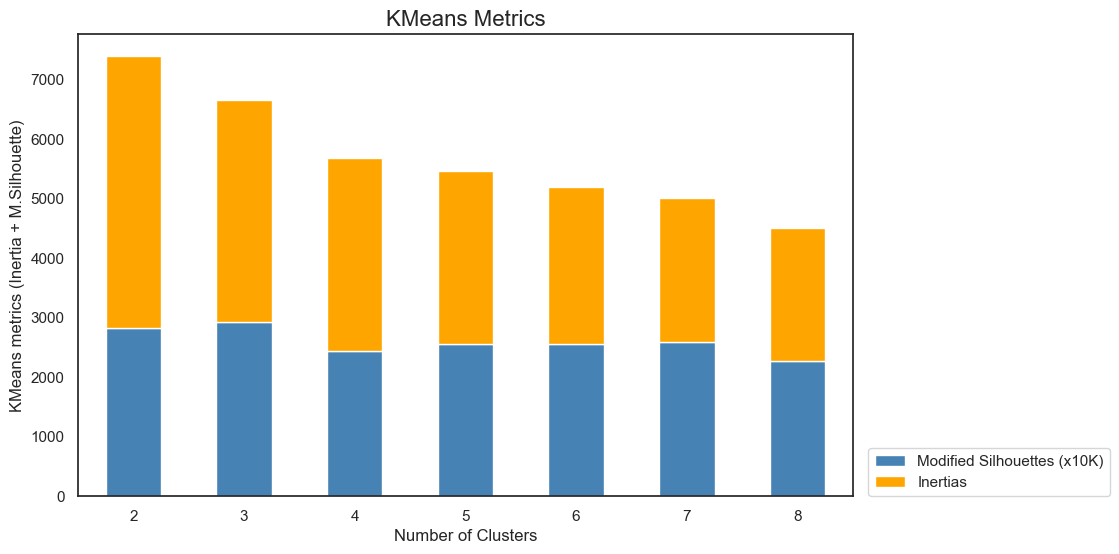

In [29]:
# Now, let's plot our Stacked Bar Chart.
sns.set(style='white')
kmeans_metrics_df.set_index('Number of Clusters').plot(kind='bar', stacked=True, color=['steelblue', 'orange'], figsize=(10,6))
plt.title('KMeans Metrics', fontsize=16)
plt.xlabel('Number of Clusters')
plt.ylabel('KMeans metrics (Inertia + M.Silhouette)')
plt.xticks(rotation=0)
plt.legend(loc=(1.02,0));


**Observations:**
- In the graph above, we can see how the 'Inertias' bars tend to go down as we showed at the end of Section 5.1.
- One of the reasons to plot both metrics together, is to show that in our second bar (Inertia Score = 3,725.79) we have the highest silhouette score (0.2937) with K=3, that in this case the silhouette score was modified for plotting reasons.
- Using this scale on Silhouette Score (times 10K), the score between Number of Clusters 4 and 8 looks pretty "stable" even when the inertia is still going down.

In [30]:
# Add a column to the dataset, adding the cluster label as we fit and predict df.
df['Cluster'] = kmeans_with_3_clusters.fit_predict(scaled_df)
df.head()

,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,1.197,0.0,6.3,0
1,47,1,26,100,12.800,0.0,12.8,1
2,33,2,10,57,11.913,1.0,20.9,2
3,29,2,4,19,1.197,0.0,6.3,0
4,47,1,31,253,18.216,0.0,7.2,1


In [31]:
# Let's replace numbers for letters in Cluster column.
list_replacement = {0:'A', 1:'B',2:'C'}

df['Cluster'] = df['Cluster'].replace(list_replacement)

In [32]:
df.head()

,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,1.197,0.0,6.3,A
1,47,1,26,100,12.800,0.0,12.8,B
2,33,2,10,57,11.913,1.0,20.9,C
3,29,2,4,19,1.197,0.0,6.3,A
4,47,1,31,253,18.216,0.0,7.2,B


In [33]:
# Let's export the cleaned dataset as csv file.
df.to_csv('./Data/DataFrame_Customers_with_Cluster.csv', index = False)

In [34]:
# Let's export the cleaned dataset as excel file.
df.to_excel('./Data/DataFrame_Customers_with_Cluster.xlsx', merge_cells=False)

In [35]:
# Let's group the dataframe by cluster and aggregate by mean values.
cluster_groups_mean = df.groupby('Cluster', as_index=False).mean()
cluster_groups_mean

,Cluster,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,A,33.324952,1.599613,7.172147,34.833656,2.684012,0.000000,8.110058
1,B,43.808642,1.888889,17.709877,99.296296,10.842222,0.098765,12.318519
2,C,31.865497,1.877193,4.116959,32.625731,4.755439,0.976608,14.370760


**Observations:**
- In the dataset above, we displayed the means of each feature clustered in three groups (A, B, C).
- Youngest is the mean of the clusters, income follows the same relationship. But, Cluster A has the most financially organized group (lowest mean in debt income ratio).
- Let's graph some plots in order to visually explain cluster performance, and also see if we can identify more insights.

Means per Cluster per Feature


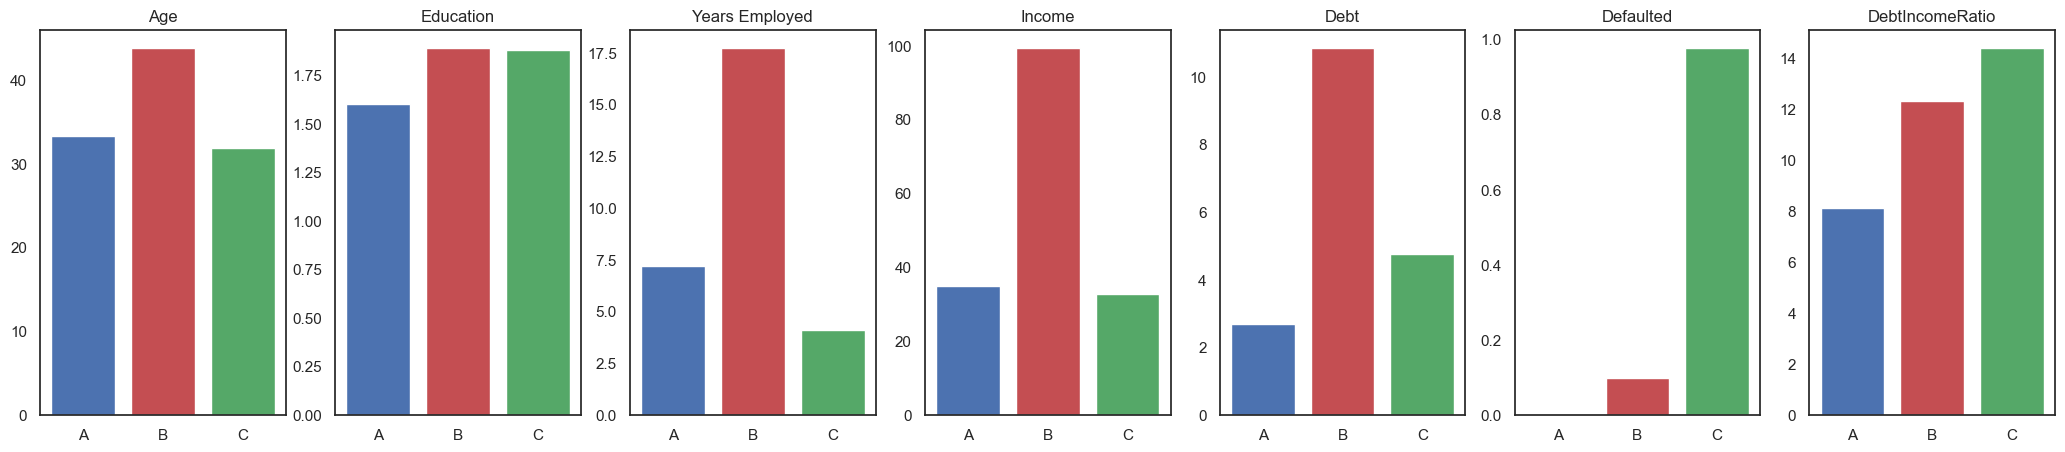

In [36]:
# Let's visualize means per cluster.
fig, axes = plt.subplots(1,7, figsize = (26,5))
axes = axes.ravel()

# Define colors per column.
b = 'blue'
r = 'red'
g = 'green'

print('\033[1mMeans per Cluster per Feature\033[0;0m')

# Loop over columns and plot each in a separate figure, skip 'Cluster' column.
for i, col in enumerate(cluster_groups_mean.columns[1:]):
  axes[i].bar(cluster_groups_mean['Cluster'], cluster_groups_mean[col], color=['b','r','g'])
  axes[i].set_title(f'{col}');

**Observations:**
- In general we can say:
  - As we noticed before, Cluster B is the oldest and the group with a higher mean in education level, years employed, income, and debt but the second one with worst debt income ratio.
 - The youngest cluster (C) has had been failed most frequently defaulted on their obligations. At the same time, it's the group with the second highest education level and debt.
  - Cluster A has the most balanced behavior, but they must not forget to improve their education level to avoid issues like Cluster B has.
- In order to enrich our analysis, we are going to plot bar charts per each cluster, displaying minimum value, maximum value, standard deviation, and sample size. After these four plot groups we are going to describe some conclusions per cluster, because this is the way that we would profile the potential customers for the new credit cards.

Minimum Value per Cluster per Feature


,Cluster,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,A,20,1,0,13,0.075,0.0,0.1
1,B,30,1,5,26,0.780,0.0,1.0
2,C,20,1,0,14,0.279,0.0,0.9


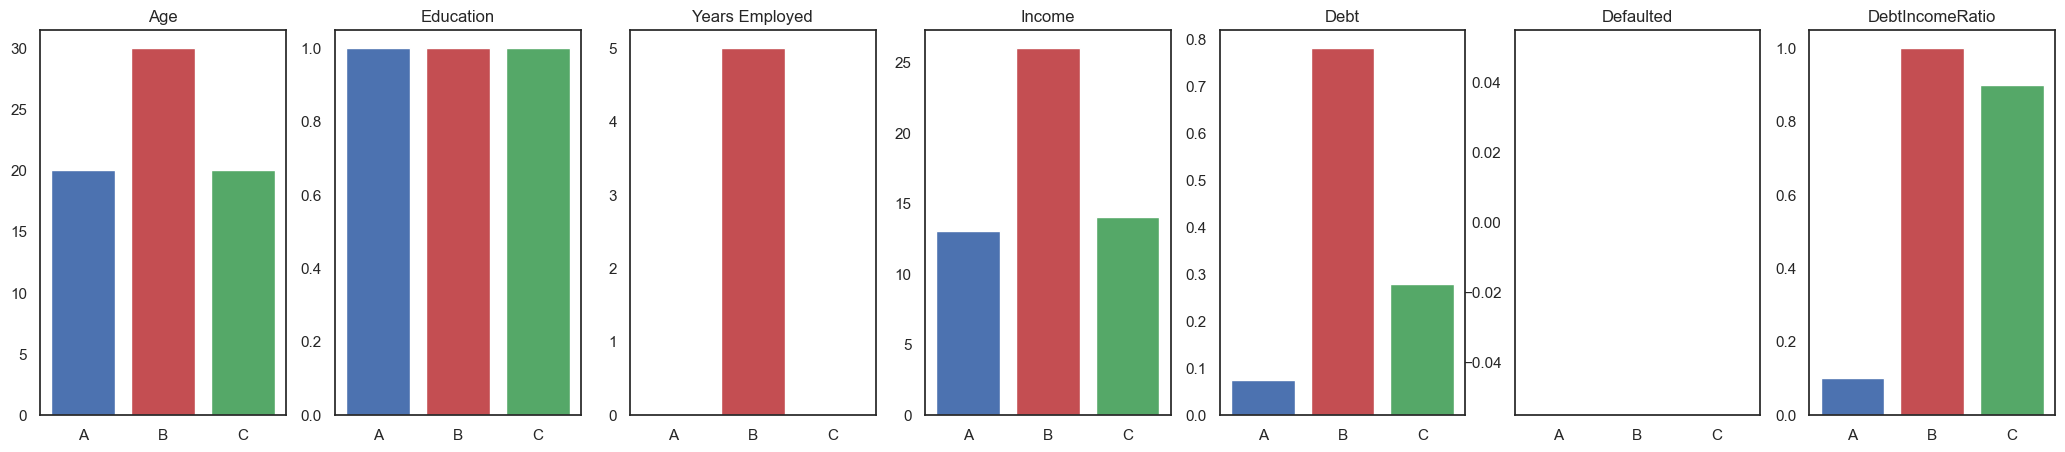

In [37]:
# Let's visualize minimum value per cluster.
cluster_groups_min = df.groupby('Cluster', as_index=False).min()
print('\033[1mMinimum Value per Cluster per Feature\033[0;0m')

fig, axes = plt.subplots(1,7, figsize = (26,5))
axes = axes.ravel()

for i, col in enumerate(cluster_groups_min.columns[1:]):
  axes[i].bar(cluster_groups_min['Cluster'], cluster_groups_min[col], color=['b','r','g'])
  axes[i].set_title(f'{col}');

cluster_groups_min

Maximum Value per Cluster per Feature


,Cluster,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,A,50,5,22,105,11.960,0.0,24.6
1,B,56,5,33,446,48.750,1.0,41.3
2,C,55,5,16,94,19.305,1.0,36.6


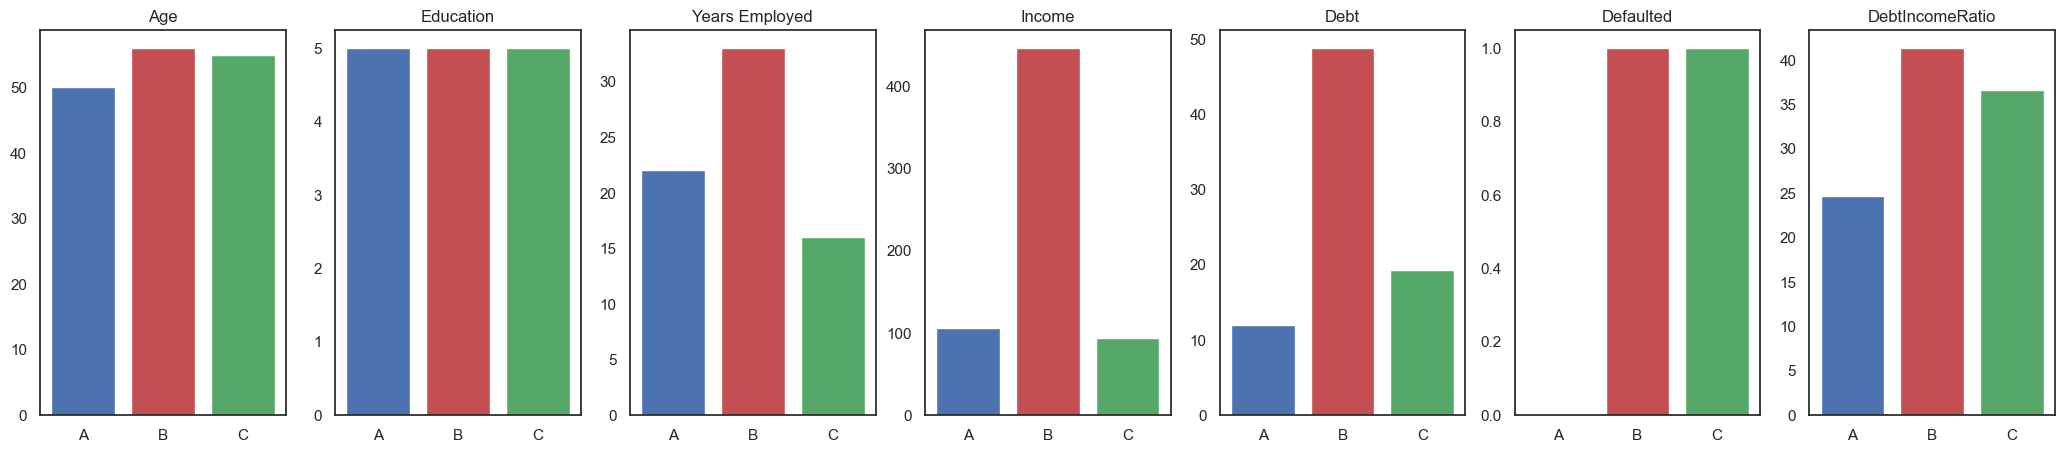

In [38]:
# Let's visualize maximum value per cluster.
cluster_groups_max = df.groupby('Cluster', as_index=False).max()
print('\033[1mMaximum Value per Cluster per Feature\033[0;0m')

fig, axes = plt.subplots(1,7, figsize = (26,5))
axes = axes.ravel()

for i, col in enumerate(cluster_groups_max.columns[1:]):
  axes[i].bar(cluster_groups_max['Cluster'], cluster_groups_max[col], color=['b','r','g'])
  axes[i].set_title(f'{col}');

cluster_groups_max

Standard Deviation per Cluster per Feature


,Cluster,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,A,6.741548,0.869509,4.959854,15.772099,1.859200,0.000000,4.983451
1,B,5.576720,1.021508,5.958117,57.502243,7.559664,0.299272,7.655869
2,C,7.949068,0.959231,3.955384,16.398717,3.726432,0.151588,7.716527


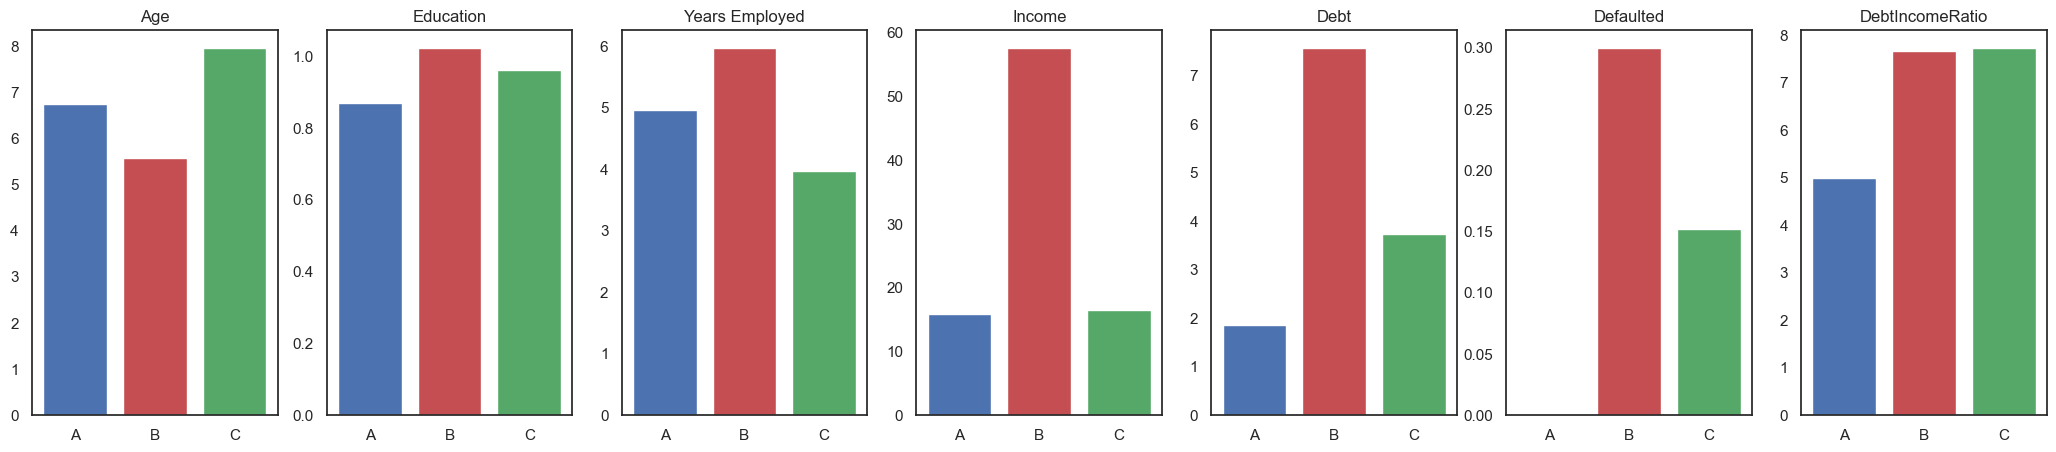

In [39]:
# Let's visualize standard deviation per cluster.
cluster_groups_std = df.groupby('Cluster', as_index=False).std()
print('\033[1mStandard Deviation per Cluster per Feature\033[0;0m')

fig, axes = plt.subplots(1,7, figsize = (26,5))
axes = axes.ravel()

for i, col in enumerate(cluster_groups_std.columns[1:]):
  axes[i].bar(cluster_groups_std['Cluster'], cluster_groups_std[col], color=['b','r','g'])
  axes[i].set_title(f'{col}');

cluster_groups_std

Sample Size per Cluster per Feature


,Cluster,Age,Education,Years Employed,Income,Debt,Defaulted,DebtIncomeRatio
0,A,517,517,517,517,517,517,517
1,B,162,162,162,162,162,162,162
2,C,171,171,171,171,171,171,171


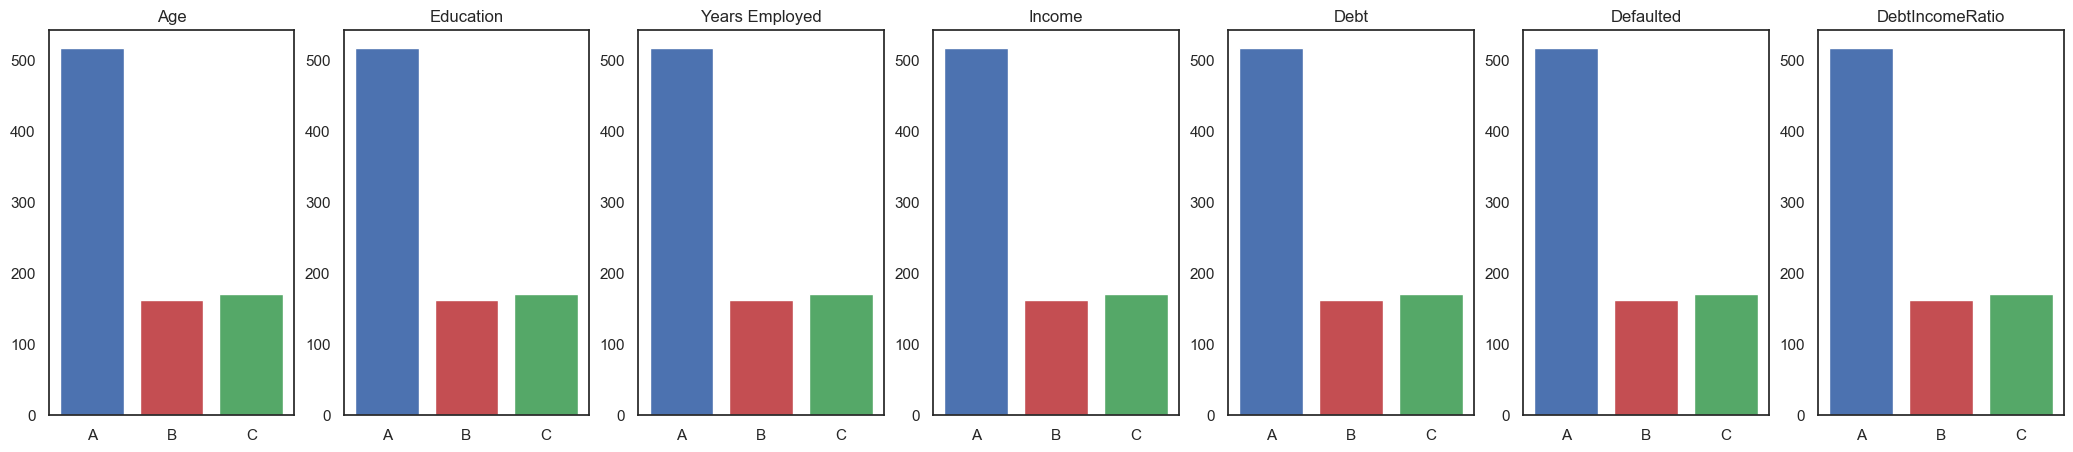

In [40]:
# Let's visualize sample size per cluster.
cluster_groups_count = df.groupby('Cluster', as_index=False).count()
print('\033[1mSample Size per Cluster per Feature\033[0;0m')

fig, axes = plt.subplots(1,7, figsize = (26,5))
axes = axes.ravel()

for i, col in enumerate(cluster_groups_count.columns[1:]):
  axes[i].bar(cluster_groups_count['Cluster'], cluster_groups_count[col], color=['b','r','g'])
  axes[i].set_title(f'{col}');

cluster_groups_count

**Observations:**
- In the next table, we summarize the values found per cluster per feature, as was plot above, considering Min, Max, Mean, and Std (standard deviation).
  - The table shows a Factor element. This will be explained in Section 5.5.

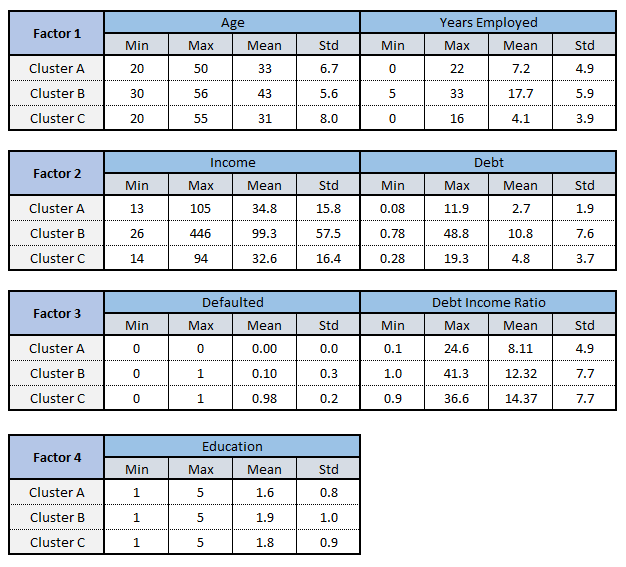

**Conclusions about the table above:**
- Cluster A:
  - Having bigger sample size (517 : ~60.82%), any result here will be significantly relevant, especially when it has been identified as the most balanced group.
  - It's the second youngest group with lowest max value (50 years old) with second best years employed mean.
  - It has the second best income (mean) with lowest income standard deviation, plus lowest mean and std in debt.
  - It had never defaulted on their financial obligations, with lowest debt income ratio which is great.
  - It has the lowest std for education level but also lowest mean for this feature.
- Cluster B:
  - Represents the lowest sample size (162 : ~19.05%).
  - It's the oldest group with also lowest standard deviation for age. Obviously has highest mean in years employed, but also highest std.
  - This group has the highest income mean but also std, which is not good. Same characteristic for debt.
  - It has some values identified in defaulted, but is the second in the ranking. About debt income ratio is pretty much the same but its standar deviation is the same as the "worse group" in this feature (Cluster C), which make them look not good at all.
  - Its highest mean in education level is good, and besides having highest std, the difference between standard deviation in this feature is not too significant.
- Cluster C:
  - This group represents ~20.12% of the sample (171 customers).
  - It's the youngest group (mean=31) but the wider on age because has highest standard deviation. Also, it has lowest mean and std for years employed, which is not good being the wider group in age.
  - It has the lowest max value and mean in income, and also the second best in debt.
  - It's the group with worse performance in defaulted and debt-income ratio, with the highest mean on both features.
  - In education level, it's the group with second best performance.

According to the statements described, we should recommend Cluster A for the Platinum Credit Card, and Cluster C for Gold Credit Card.

### 5.5.- Customer profile
- We must keep in mind the new credit cards that our stakeholder wants to market are (see Section B for product description):
  - Platinum. Will be designated to our best recommendation (Cluster A for now).
  - Gold. Designated for our second best group recommended.
- We have designed a customer perfilation process in order to evaluate each cluster deeply. We have four factors:
  - Factor 1: consider the relationship between age and years employed.
  - Factor 2: consider income and debt.
  - Factor 3: consider defaulted and debt income ratio.
  - Factor 4: education level.
- The first factor is the most important, and Factor 4 is the last to consider. For that reason, each factor has a different specific weight:
  - Factor 1: 1.4.
  - Factor 2: 1.2.
  - Factor 3: 1.0.
  - Factor 4: 0.8.
- In the next table, we evaluate each factor per feature, where:
  - Score: it's a designated number between 1, 2, and 3. The way how Score works is explained in this [video](https://www.youtube.com/watch?v=5WIfe1bebus).
  - Av Score: it's the median of each score from the statistic variable evaluated.
  - SW: it's the specific weight.
  - Result: it's 'Av Score' times 'SW'. The highest is this number, better is the performance per cluster on its feature.


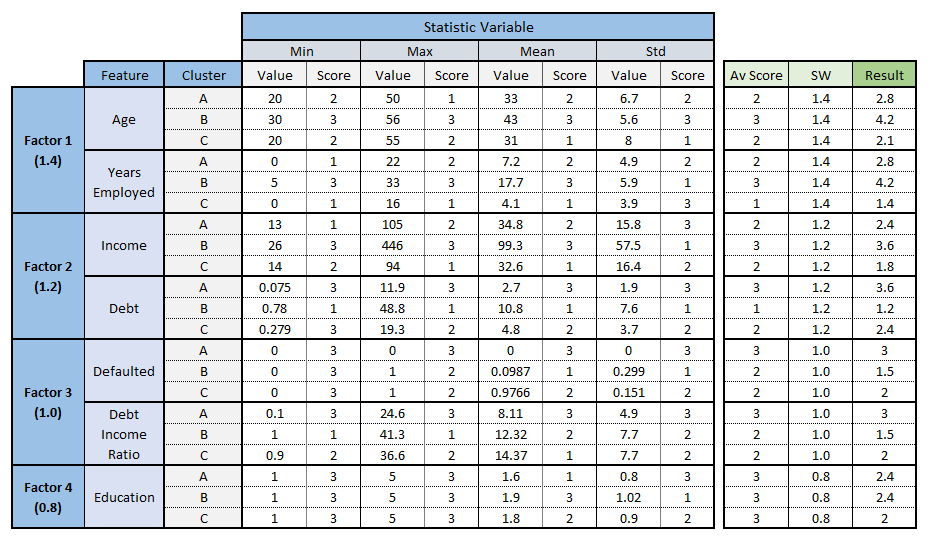

**Observations:**
- One of the reasons to create the 'Result' indicator, was to plot bars that show that the higher gets the bar better the result, as the graph below displays.
- As we reported in Section 5.4 conclusions, Cluster A is the one to be recommended for Platinum Credit Card.
- In general, we can say:
  - Cluster A has the best performance over all.
  - Cluster B has second best performance, taken as reference Final Score. Even though, we don't recommend this group because they have the worse performance in 'Debt', 'Defaulted', and 'Debt Income Ratio', plus they have the highest standard deviation in 'Income'.
  - Cluster C has the second best performance in 'Debt', 'Defaulted', and 'Debt Income Ratio'. If we recap Section 5.4 conclusions about this cluster, we reported to have the "worse performance in defaulted and debt-income ratio", but considering the way we just evaluated mean and standard deviation using designated scores, this group has the second best performance on both important features. 

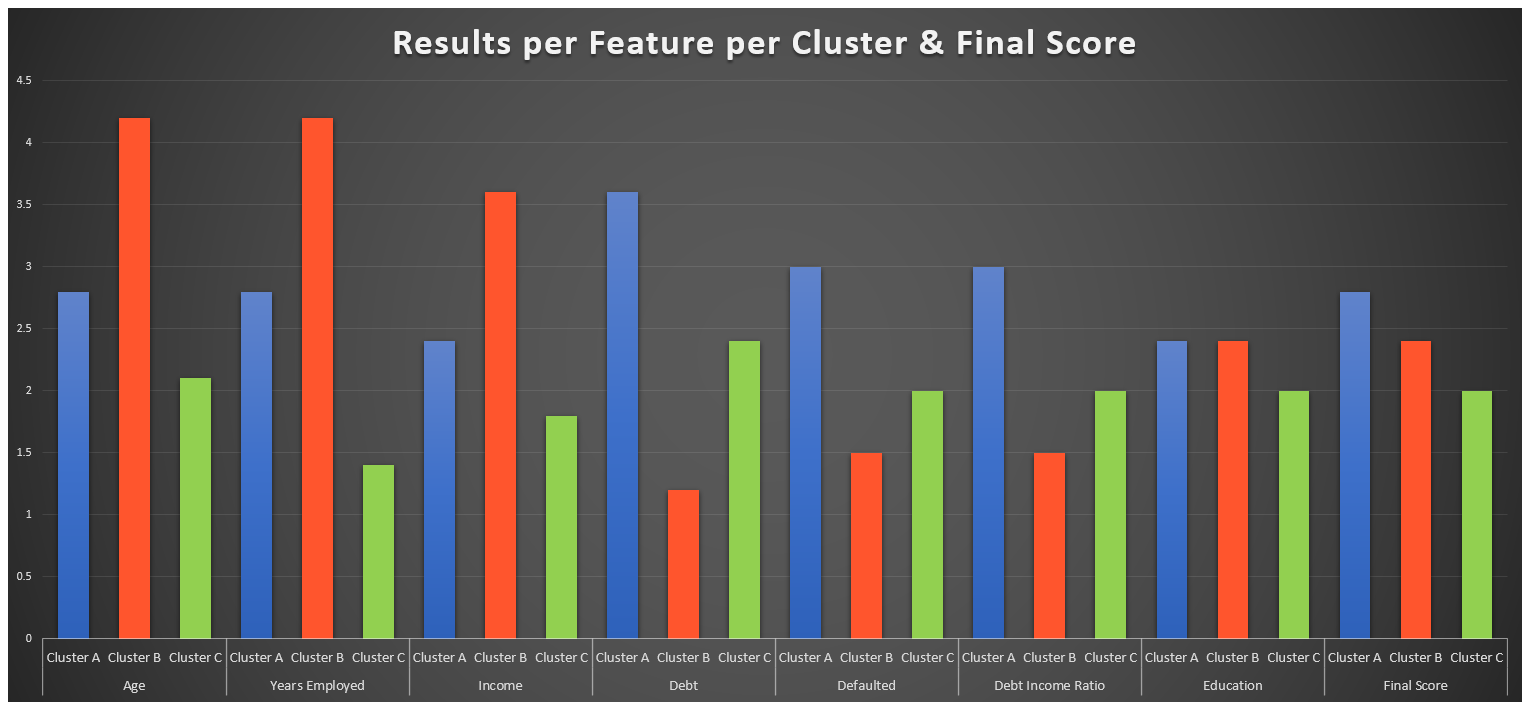

# C. Conclusions & Recommendations

1. Our stakeholder (Credit Card Company) has asked us to segment their potential customers to determine how and what kind of cards they should market to each group. The credit cards they want to market are Platinum and Gold, and we have segmented their potential customers as Cluster A, Cluster B, and Cluster C. So, according to this and all the data analysis developed in Section 5:
  - Platinum Credit Card should be marketed to Cluster A.
  - Gold Credit Card should be marketed to Cluster C.

2. How each credit card should be marketed?
 - Platinum:
    - Using keywords like rewards, membership, accountable, and liable in marketing content. This is the group (Cluster A) that so far long haven't failed on their financial compromises (0 values found on 'Defaulted'), so those kind of words would make them feel part of the product.
    - Cluster A is still young (average age of 33) and they need a little help to improve their 'Income'. Thereby, a credit card that helps them to enjoy life (vacations) without negatively affecting their financial performance, could be another part of the campaign.

 - Gold: 
    - If Cluster C improves its 'Income' performance, they will get a better 'Result' score. So the marketing campaign for them could include "promises" about how this group can improve its income managing strategies using Gold Credit Card.
    - Also, this is the youngest group, so they believe in future. Another keyword for the content marketing.

3. But, what about Cluster B? We haven't forgotten them and we have something to be marketed to this group. In the first meeting with our stakeholders, we were informed that they have a strategic alliance with another financial company that markets retirements plans. The main goal of this alliance is to educate and help customers to improve financial behavior in order to be prepared for later years. For this reason and as in addition to the insights reported in Section 5, let's display some dataframes to complement the findings about Cluster B since we are seeking to improve their financial performance to sell them a Retirement Plan.
  - Retirement Plan offers also education for customers, for this reason, we are recommending it be advertised to Cluster B.

In [41]:
# Let's have a closer look at 'Income'.
print('\033[1mDataFrame for Income\033[0;0m')
df.groupby('Cluster')['Income'].describe()

DataFrame for Income


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
A,517.0,34.833656,15.772099,13.0,23.00,31.0,43.0,105.0
B,162.0,99.296296,57.502243,26.0,63.25,81.5,116.0,446.0
C,171.0,32.625731,16.398717,14.0,20.00,28.0,41.0,94.0


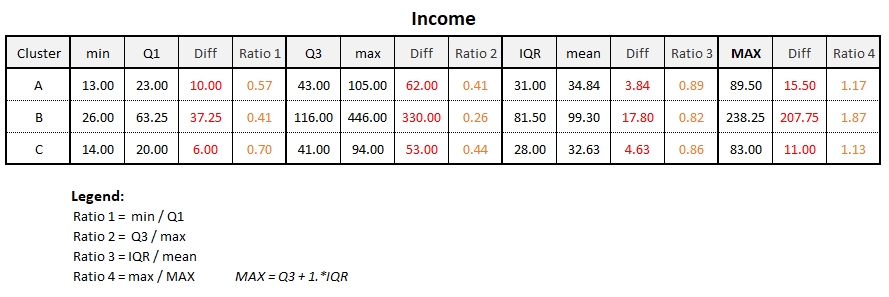

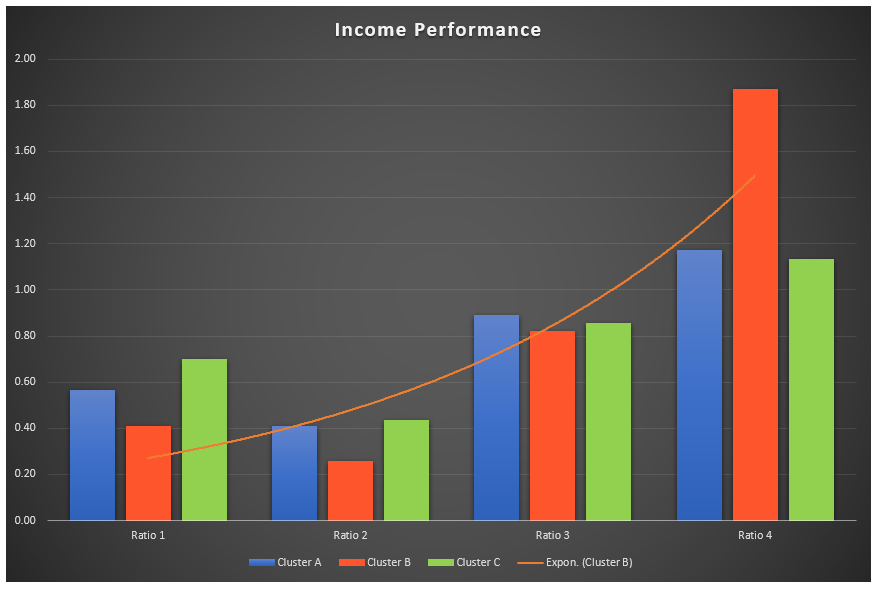

**Conclusions about Income for Cluster B:**
- Cluster B is the most unstable in this parameter, because:
  - It has a higher standard deviation compared with other clusters. 0.58 ratio with its mean (Cluster A: 0.45 & Cluster C: 0.50).
  - Its maximum value is ~3.8 times higher than its Q3 (75th percentile), and its minimum value is ~2.4 times lower than its Q1. This means we have outliers in the data, so the behavior is less normalized. But seeing the bar chart, its Ratio 4 is higher than the rest, meaning that Cluster B is more capable to make more money.
  - Its difference between Q1 and the minimum (37.25) is higher than the other clusters (Cluster A: 10 & Cluster C: 6). However, this higher difference means that minimum values are lower than first percentile. So, some samples income is less than 25% of their group.


 


In [42]:
# Let's have a closer look at 'Debt'.
print('\033[1mDataFrame for Debt\033[0;0m')
df.groupby('Cluster')['Debt'].describe()

DataFrame for Debt


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
A,517.0,2.684012,1.859200,0.075,1.35000,2.312,3.60000,11.960
B,162.0,10.842222,7.559664,0.780,5.92875,9.435,13.67025,48.750
C,171.0,4.755439,3.726432,0.279,2.03800,3.627,6.21350,19.305


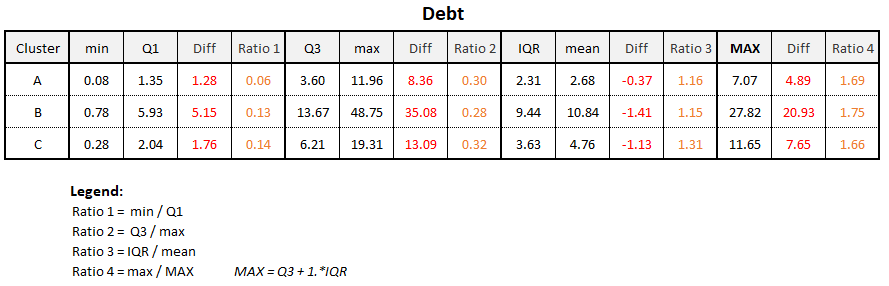

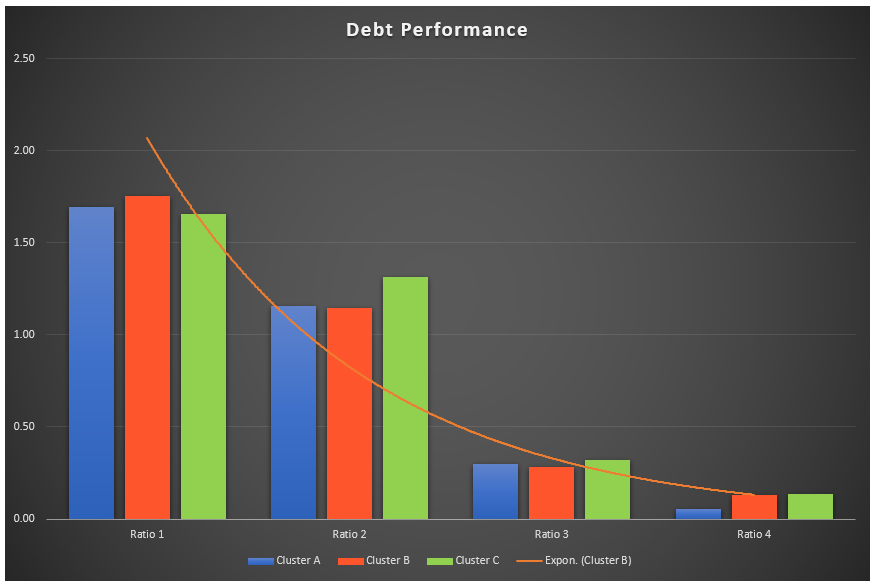

**Conclusions about Debt for Cluster B:**
- Cluster B is the group that spend more money, for these reasons:
  - It has a higher min (0.78) and maximum values (48.75) compared with the other clusters.
  - Its difference between Q1 and the minimum value (5.15) is higher than the other clusters (Cluster A: 1.28 & Cluster C: 1.76, avergare 1.52 between both groups).
    - This difference is 3.39 times higher than the average between Cluster A and C, making them look more unstable group. So, when they try to spend less in order to save money, apparently it's harder for this group. The highest Ratio 1.
  - The difference between maximum value (48.75) and Q3 is equal to 35.08.
    - Compared with Cluster A (8.36) and Cluster C (13.1), this difference is ~2.7 times higher than Cluster C, which is the second group with high debt, and ~4.2 times higher than Cluster A.
  - Comparing maximum value against the Maximum (Q3 + 1.5*IQR = 27.82), we identified a difference of 20.93. 
    - This difference is ~4.3 times higher than Cluster A (Maximum = 4.89) and ~2.7 times higher than Cluster C (Maximum = 7.65).
  - With the last statements, we want to point that even when the data displays a max value (48.75) that potentially could be "non-recurring event", the similarity between those ratios indicates how Cluster B high debt frequently occurs with this group.
  - It is risky for Cluster B to have the highest Ratio 4, even if the tendency to spend money reduces as the amount increases.

In [43]:
# Let's have a closer look at 'DebtIncomeRatio'.
print('\033[1mDataFrame for Debt-Income Ratio\033[0;0m')
df.groupby('Cluster')['DebtIncomeRatio'].describe()

DataFrame for Debt-Income Ratio


,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
A,517.0,8.110058,4.983451,0.1,4.500,7.0,10.600,24.6
B,162.0,12.318519,7.655869,1.0,6.525,11.6,15.775,41.3
C,171.0,14.370760,7.716527,0.9,8.400,13.3,19.200,36.6


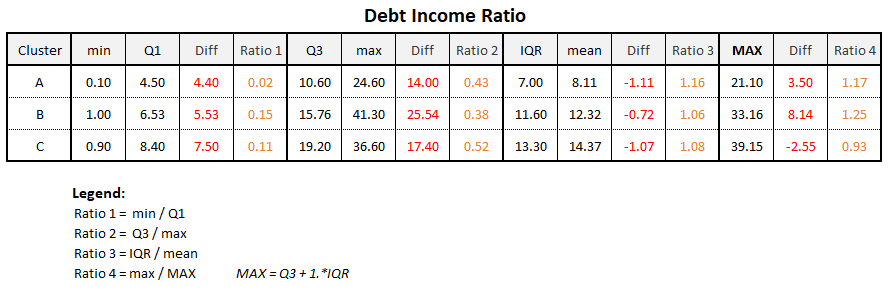

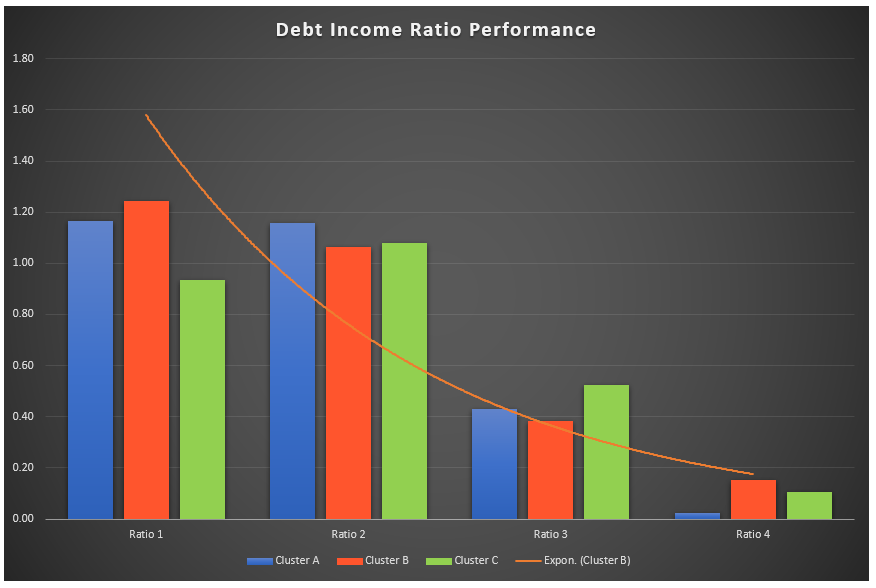

**Conclusions about Debt Income Ratio for Cluster B:**
- The observations described about 'Income' & 'Debt' above, gave us an idea what we can expect in Debt Income Ratio performance for Cluster B.
  - But so far, the positive and high difference between IQR and mean (17.80) reported in DataFrame for Income compared with a low and negative difference between IQR and mean (-1.41) for DataFrame for Debt, indicates how unstable is the income in order to cover the expenses for this group.
- As we know already, Cluster B does not have the worst Debt Income Ratio, but even though:
  - Its maximum value (41.3) is ~1.7 times higher than maximum value in Cluster A (24.6) and ~0.03 times higher than maximum value in Cluster C (36.6).
- Ratio 4 of Cluster B is the highest, the same performance reported in Income (1.87) and Debt (1.75) tables above. This indicates high tendency to get out of control in their financial performance.

**Conclusions & Recommendations for Cluster B:**
- This cluster has been showing that this sample of customers is capable to generate high incomes. We consider the educational strategy should be focused on how this group could balance their debts in order to avoid high scores in 'Debt Income Ratio'.
- This group has a great education level, so is easy coachable. See 'Results' in Section 5.5.
- Being the oldest group, they are looking for hope in some way. Also, they believe in results. For these reasons, offering a program where they would see results and save money at the same time, could improve their lifestyle.